# 梯度縮減(Gradient Descent)
以y = x^2的範例，說明深度學習網路如何透過可微分之函數逼近目標最小值

[1.00000000e+01 4.00000000e+00 1.60000000e+00 6.40000000e-01
 2.56000000e-01 1.02400000e-01 4.09600000e-02 1.63840000e-02
 6.55360000e-03 2.62144000e-03 1.04857600e-03 4.19430400e-04
 1.67772160e-04 6.71088640e-05 2.68435456e-05 1.07374182e-05
 4.29496730e-06 1.71798692e-06 6.87194767e-07 2.74877907e-07
 1.09951163e-07]


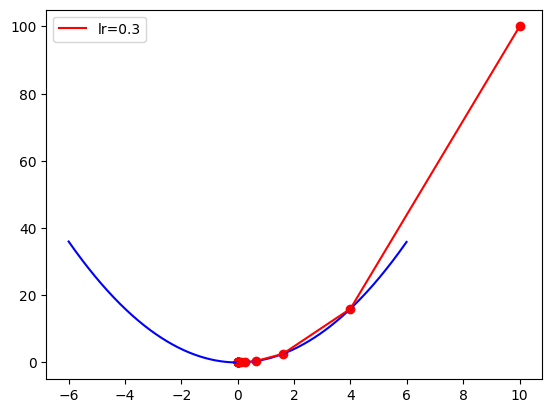

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點
        :param df: 目標函數的一階導函數
        :param epochs: 反覆運算週期
        :param lr: 學習率
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1
     """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改變的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

# Main
# 起始權重
x_start = 10
# 執行週期數
epochs = 20
# 學習率
lr = 0.3
# 梯度下降法
x = GD(x_start, dfunc, epochs, lr=lr)
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'
#plt.plot(line_x, line_y, c='b')
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
plt.scatter(x, func(x), c=color, )
plt.legend()

plt.show()

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
data = np.random.random((1000, 10)) #隨機產生1000筆資料，每筆資料包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) #隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)
print(np.shape(data))
print(data[0])
print(np.shape(labels))
print(labels[0])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

(1000, 10)
[0.3756309  0.93596222 0.33594302 0.16984944 0.56278521 0.13048765
 0.99861966 0.84802426 0.5660958  0.34577068]
(1000, 1)
[0]
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5180
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5110
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5110
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5190
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5160
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5190
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5210
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5110
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6899

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

import numpy as np
data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 10))

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 493.5753 - accuracy: 0.0800
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 1504.1954 - accuracy: 0.0700
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 2699.7563 - accuracy: 0.0700
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 4016.2004 - accuracy: 0.0720
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 5451.9048 - accuracy: 0.0720
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 6729.7505 - accuracy: 0.0670
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 7912.6206 - accuracy: 0.0610
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 9577.6992 - accuracy: 0.0640
Epoch 9/10
32/32 [==============================] - 1s 20ms/step - loss: 10873.5635 - accuracy: 0.0710
Epoch 10/10
32/32 [==============================] - 1s 7ms/step - loss: 10657.1797 - accu

In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23466 (91.66 KB)
Trainable params: 23466 (91.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  

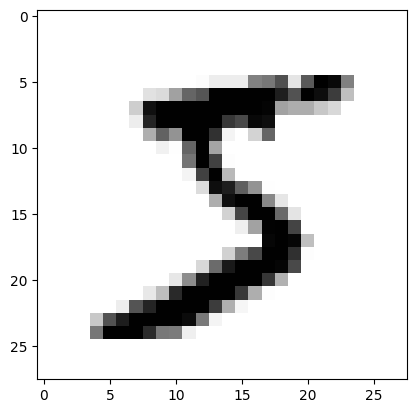

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 8.0251 - accuracy: 0.5799
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.8981 - accuracy: 0.7514
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.8172
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.5419 - accuracy: 0.8551
Epoch 5/20
118/118 [==============================] - 1s 4ms/step - loss: 0.4545 - accuracy: 0.8780
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8941
Epoch 7/20
118/118 [==============================] - 1s 4ms/step - loss: 0.3424 - accuracy: 0.9112
Epoch 8/20
118/118 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.9214
Epoch 9/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2777 - accuracy: 0.9273
Epoch 10/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2547 - accuracy: 0.9315

KeyboardInterrupt: ignored

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
model=Sequential()
model.add(Flatten())
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

print(type(train_data))
print(train_data.shape)
print(type(train_label))
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

print(train_label[0])
print(train_data[0])

import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap='binary')
plt.show()

model.fit(train_data,train_label,epochs=20,batch_size=512)

score=model.evaluate(test_data, test_label)
print(score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                 

NameError: ignored

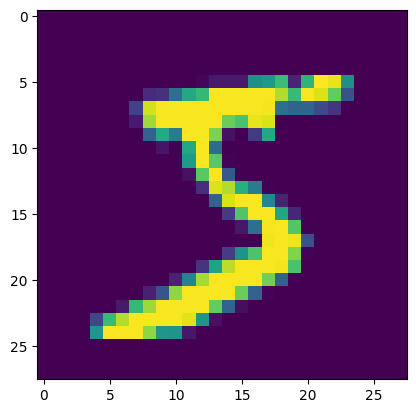

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])


In [11]:
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd

# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')  # 讀取訓練集
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 65, batch_size = 32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

--2023-11-09 12:30:41--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2023-11-09 12:30:41--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv.1’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.01s   

2023-11-09 12:30:41 (4.72 MB/s) - ‘Google_Stock_Price_Train.csv.1’ saved [63488/63488]

KeyboardInterrupt: ignored

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#加入雜訊
noise_factor = 0.5
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#autoencoder模型建立
autoencoder=Sequential()
#encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#Decoder
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# 編譯模型，optimizer 使用 adam，loss 使用 binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 訓練 Autoencoder ，輸入是加入雜訊的圖片，輸出是原始圖片
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128)

#將有雜訊的測試影像丟入訓練好的模型進行訓練
denoised_images = autoencoder.predict(x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2], 1))

#繪製圖形
plt.figure(figsize=(20, 6))

for i in range(10):
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax = plt.subplot(3, 10, i+21)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
plt.show()

Epoch 1/20
469/469 [==============================] - 65s 135ms/step - loss: 0.2465
Epoch 2/20
469/469 [==============================] - 67s 142ms/step - loss: 0.1760
Epoch 3/20
469/469 [==============================] - 68s 146ms/step - loss: 0.1648
Epoch 4/20
469/469 [==============================] - 68s 145ms/step - loss: 0.1572
Epoch 5/20
469/469 [==============================] - 71s 150ms/step - loss: 0.1517
Epoch 6/20
469/469 [==============================] - 65s 138ms/step - loss: 0.1476
Epoch 7/20
469/469 [==============================] - 64s 136ms/step - loss: 0.1445
Epoch 8/20
469/469 [==============================] - 63s 135ms/step - loss: 0.1419
Epoch 9/20
 70/469 [===>..........................] - ETA: 57s - loss: 0.1410